In [35]:
import re, json
import matplotlib.pyplot as plt
import numpy as np

def detregPlotLoss(txtPath, task, title, start=0, end=None):
    txt = open(txtPath,"r").read()
    txtL = re.findall("\{(.*)\}", txt) # epoch split
    plt.title(title, fontsize=16)
    plt.xlabel("epochs", fontsize=16)
    plt.ylabel("loss", fontsize=16)
    if True:
        train_loss_L = [ json.loads("{"+txtL[i]+"}")["train_loss"] for i in range(len(txtL)) ]
        plt.plot(train_loss_L[start:end])
    if task=="finetune":
        val_loss_L   = [ json.loads("{"+txtL[i]+"}")["test_loss"] for i in range(len(txtL)) ]
        plt.plot(val_loss_L[start:end])
    plt.grid('on')
    plt.show()
    n = len(train_loss_L)
    print(f"min(zip(train_loss_L,range(n)))={min(zip(train_loss_L,range(n)))}" if task=="pretext" else f"min(zip(val_loss_L,range(n)))={min(zip(val_loss_L,range(n)))}")
    return train_loss_L if task=="pretext" else val_loss_L

def getBest(evalTxtPath):
    txt   = open(evalTxtPath).read()
    ckptL = re.findall("---_exps/.*(checkpoint.*).pth---", txt)
    apL   = re.findall("Average Precision.*IoU=0.50 .* all.*= (.*)", txt)
    arL   = re.findall("Average Recall.*IoU=0.50:0.95 .* all.*maxDets=100.*= (.*)", txt)
    print( max( (ap,ar,ckpt) for ap,ar,ckpt in zip(apL,arL,ckptL) ) )

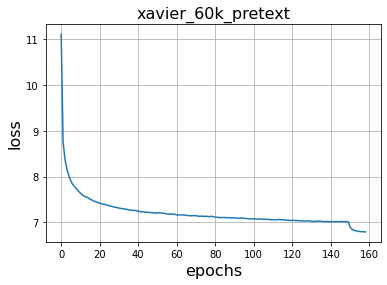

min(zip(train_loss_L,range(n)))=(6.793687584511516, 158)


In [3]:
trainL = detregPlotLoss("../_exps/pretext/xavier_60k/log.txt","pretext","xavier_60k_pretext")

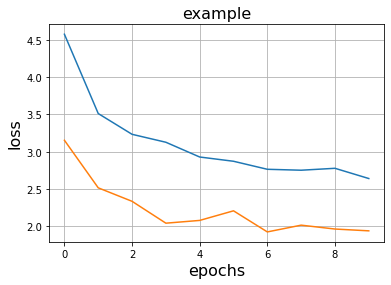

min(zip(val_loss_L,range(n)))=(1.9241855476960408, 6)
('0.986', '0.880', 'checkpoint0009')


In [36]:
valL = detregPlotLoss("../_exps/downstream/example/log.txt","finetune","example")
getBest("../_exps/downstream/example/eval.txt")